In [57]:
import numpy as np 
import pandas as pd 

from fbprophet import Prophet
from fbprophet.plot import plot_plotly
from fbprophet.plot import add_changepoints_to_plot

import plotly.offline as py
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker


In [58]:
case = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv")
case_df=case.loc[case['Country/Region'].isin(['Turkey']),:]
case_df = case_df.drop(case_df.columns[0:4], axis=1)

deaths = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv")
deaths_df=deaths.loc[deaths['Country/Region'].isin(['Turkey']),:]
deaths_df = deaths_df.drop(deaths_df.columns[0:4], axis=1)

recoveries = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv")
recoveries_df=recoveries.loc[recoveries['Country/Region'].isin(['Turkey']),:]
recoveries_df = recoveries_df.drop(recoveries_df.columns[0:4], axis=1)

In [59]:
case_df = case_df.apply(pd.to_numeric)
case_df = case_df.T.reset_index()
case_df.columns = ['ds', 'y']

deaths_df = deaths_df.apply(pd.to_numeric)
deaths_df = deaths_df.T.reset_index()
deaths_df.columns = ['ds', 'y']

recoveries_df = recoveries_df.apply(pd.to_numeric)
recoveries_df = recoveries_df.T.reset_index()
recoveries_df.columns = ['ds', 'y']

In [60]:
case_df.tail(5)

,ds,y
103,5/4/20,127659
104,5/5/20,129491
105,5/6/20,131744
106,5/7/20,133721
107,5/8/20,135569


In [61]:
C = ['2020-03-15','2020-03-18','2020-03-22','2020-03-26','2020-03-30','2020-04-02','2020-04-06',
     '2020-04-10','2020-04-14','2020-04-17','2020-04-21','2020-04-25','2020-04-28','2020-05-01']

D = ['2020-03-18','2020-03-22','2020-03-26','2020-03-29','2020-04-02','2020-04-06',
     '2020-04-10','2020-04-14','2020-04-25','2020-04-29','2020-05-02']

R = ['2020-03-22','2020-03-30','2020-04-02','2020-04-06','2020-04-10',
     '2020-04-14','2020-04-17','2020-04-19','2020-04-21','2020-04-25','2020-05-07']


Model_C = Prophet(changepoint_prior_scale=.5, changepoints = C) 
Model_C .fit(case_df)

Model_D = Prophet(changepoint_prior_scale=.5, changepoints = D) 
Model_D .fit(deaths_df)

Model_R = Prophet(changepoint_prior_scale=.9, changepoints = R) 
Model_R .fit(recoveries_df)

In [62]:
Future_C = Model_C.make_future_dataframe(periods=15)
Future_D = Model_D.make_future_dataframe(periods=15)
Future_R = Model_R.make_future_dataframe(periods=15)

Forecast_C = Model_C.predict(Future_C)
Forecast_D = Model_D.predict(Future_D)
Forecast_R = Model_R.predict(Future_R)

In [63]:
Valitate_C = Forecast_C.copy()
Valitate_C['actual'] = case_df['y']

Valitate_D = Forecast_D.copy()
Valitate_D['actual'] = deaths_df['y']

Valitate_R = Forecast_R.copy()
Valitate_R['actual'] = recoveries_df['y']

In [64]:
f_date = pd.to_datetime('2020-03-11')
s_date = pd.to_datetime('2020-04-22')
e_date = pd.to_datetime('2020-05-08')
l_date = pd.to_datetime('2020-05-22')

In [65]:
##### TRAIN #####
C_train = Valitate_C.loc[(Valitate_C['ds'] >= f_date) & (Valitate_C['ds'] <= s_date)]
C_train['diff'] = C_train['actual'] - C_train['yhat']
C_train['MAPE'] = np.mean(abs(C_train['diff'] / C_train['actual'])) * 100

pd.options.display.float_format = '{:,.2f}'.format
C_train = C_train[['ds', 'yhat_lower','yhat','yhat_upper', 'actual','MAPE']]

##### TEST #####
C_test = Valitate_C.loc[(Valitate_C['ds'] >= s_date) & (Valitate_C['ds'] <= e_date)]
C_test['diff'] = C_test['actual'] - C_test['yhat']
C_test['MAPE'] = np.mean(abs(C_test['diff'] / C_test['actual'])) * 100

pd.options.display.float_format = '{:,.2f}'.format
C_test = C_test[['ds', 'yhat_lower','yhat','yhat_upper', 'actual','MAPE']]

C_test.to_csv('prediction_C.csv',index=False)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/s

In [66]:
##### TRAIN #####
D_train = Valitate_D.loc[(Valitate_D['ds'] >= f_date) & (Valitate_D['ds'] <= s_date)]
D_train['diff'] = D_train['actual'] - D_train['yhat']
D_train['MAPE'] = np.mean(abs(D_train['diff'] / D_train['actual'])) * 100

pd.options.display.float_format = '{:,.2f}'.format
D_train = D_train[['ds', 'yhat_lower','yhat','yhat_upper', 'actual','MAPE']]


##### TEST #####
D_test = Valitate_D.loc[(Valitate_D['ds'] >= s_date) & (Valitate_D['ds'] <= e_date)]
D_test['diff'] = D_test['actual'] - D_test['yhat']
D_test['MAPE'] = np.mean(abs(D_test['diff'] / D_test['actual'])) * 100

pd.options.display.float_format = '{:,.2f}'.format
D_test = D_test[['ds', 'yhat_lower','yhat','yhat_upper', 'actual','MAPE']]

D_test.to_csv('prediction_D.csv',index=False)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/s

In [67]:
##### TRAIN #####
R_train = Valitate_R.loc[(Valitate_R['ds'] >= f_date) & (Valitate_R['ds'] <= s_date)]
R_train['diff'] = R_train['actual'] - R_train['yhat']
R_train['MAPE'] = np.mean(abs(R_train['diff'] / R_train['actual'])) * 100

pd.options.display.float_format = '{:,.2f}'.format
R_train = R_train[['ds', 'yhat_lower','yhat','yhat_upper', 'actual','MAPE']]


##### TEST #####
R_test = Valitate_R.loc[(Valitate_R['ds'] >= s_date) & (Valitate_R['ds'] <= e_date)]
R_test['diff'] = R_test['actual'] - R_test['yhat']
R_test['MAPE'] = np.mean(abs(R_test['diff'] / R_test['actual'])) * 100

pd.options.display.float_format = '{:,.2f}'.format
R_test = R_test[['ds', 'yhat_lower','yhat','yhat_upper', 'actual','MAPE']]

R_test.to_csv('prediction_R.csv',index=False)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/s

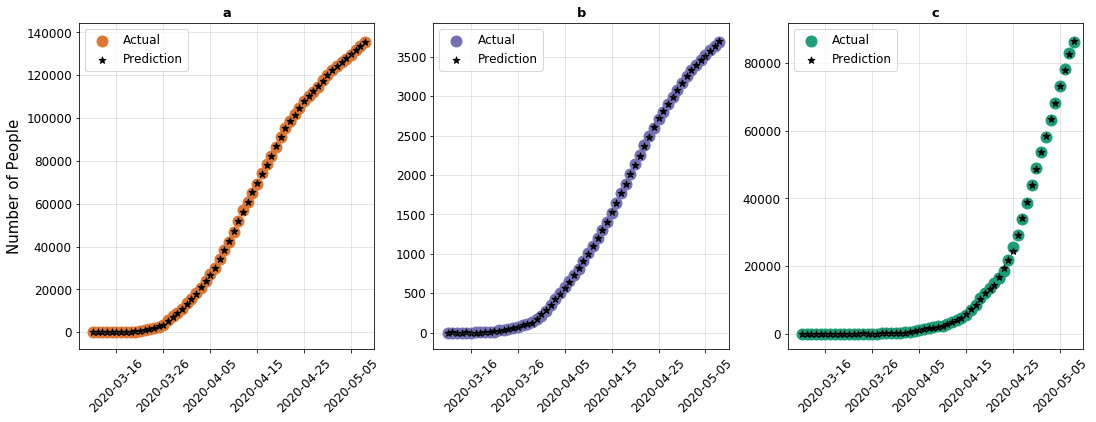

In [68]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(18, 6))

ax1.scatter(C_train['ds'],C_train['actual'], color='#DC7633', s=120)
ax1.scatter(C_train['ds'],C_train['yhat'],color='black', marker="*", s=50)
ax1.scatter(C_test['ds'],C_test['actual'], color='#DC7633', s=120,label='Actual')
ax1.scatter(C_test['ds'],C_test['yhat'],color='black',marker="*", s=50,label='Prediction')
ax1.grid(True, which='major', c='gray', ls='-', lw=1, alpha=0.2)

ax1.xaxis.set_tick_params(labelsize=12, rotation=45)
ax1.yaxis.set_tick_params(labelsize=12)

ax1.legend(prop={'size': 12})
ax1.set_xlim(pd.to_datetime('03/08/2020'),pd.to_datetime('05/10/2020'))
ax1.set_title("a", fontweight='bold',fontsize=13)
ax1.xaxis.set_major_locator(ticker.MultipleLocator(10))



ax2.scatter(D_train['ds'],D_train['actual'], color='#7570b3', s=120)
ax2.scatter(D_train['ds'],D_train['yhat'],color='black', marker="*", s=50)
ax2.scatter(D_test['ds'],D_test['actual'], color='#7570b3', s=120,label='Actual')
ax2.scatter(D_test['ds'],D_test['yhat'],color='black', marker="*", s=50,label='Prediction')
ax2.grid(True, which='major', c='gray', ls='-', lw=1, alpha=0.2)

ax2.xaxis.set_tick_params(labelsize=12, rotation=45)
ax2.yaxis.set_tick_params(labelsize=12)

ax2.legend(prop={'size': 12})
ax2.set_xlim(pd.to_datetime('03/08/2020'),pd.to_datetime('05/10/2020'))
ax2.set_title("b", fontweight='bold',fontsize=13)
ax2.xaxis.set_major_locator(ticker.MultipleLocator(10))



ax3.scatter(R_train['ds'],R_train['actual'], color='#1b9e77', s=120)
ax3.scatter(R_train['ds'],R_train['yhat'],color='black', marker="*", s=50)
ax3.scatter(R_test['ds'],R_test['actual'], color='#1b9e77', s=120,label='Actual')
ax3.scatter(R_test['ds'],R_test['yhat'],color='black', marker="*", s=50,label='Prediction')
ax3.grid(True, which='major', c='gray', ls='-', lw=1, alpha=0.2)

ax3.xaxis.set_tick_params(labelsize=12, rotation=45)
ax3.yaxis.set_tick_params(labelsize=12)

ax3.legend(prop={'size': 12})
ax3.set_xlim(pd.to_datetime('03/08/2020'),pd.to_datetime('05/10/2020'))
ax3.set_title("c", fontweight='bold',fontsize=13)
ax3.xaxis.set_major_locator(ticker.MultipleLocator(10))

ax1.set_ylabel('Number of People',fontsize=15)
# ax2.set_xlabel('Date',fontsize=15)

plt.show()

fig.tight_layout()
fig.savefig('Actual-Prediction.png', format='png', dpi=600)

In [69]:
##### PREDICTION #####
Forecast_C = Valitate_C.loc[(Valitate_C['ds'] >= e_date) & (Valitate_C['ds'] <= l_date)]
pd.options.display.float_format = '{:,.2f}'.format
Forecast_C = Forecast_C[['ds', 'yhat_lower','yhat','yhat_upper']]


Forecast_D = Valitate_D.loc[(Valitate_D['ds'] >= e_date) & (Valitate_D['ds'] <= l_date)]
pd.options.display.float_format = '{:,.2f}'.format
Forecast_D = Forecast_D[['ds', 'yhat_lower','yhat','yhat_upper']]

Forecast_R = Valitate_R.loc[(Valitate_R['ds'] >= e_date) & (Valitate_R['ds'] <= l_date)]
pd.options.display.float_format = '{:,.2f}'.format
Forecast_R = Forecast_R[['ds', 'yhat_lower','yhat','yhat_upper']]

In [70]:
Forecast_C.to_csv('forecasting_C.csv',index=False)
Forecast_D.to_csv('forecasting_D.csv',index=False)
Forecast_R.to_csv('forecasting_R.csv',index=False)

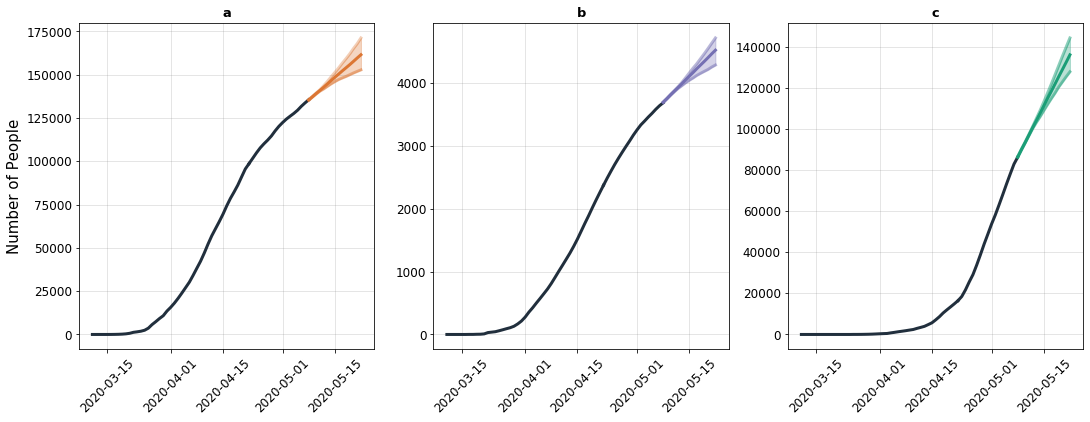

In [71]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(18, 6))

ax1.plot(C_train['ds'],C_train['actual'], color='#212F3D', linewidth=3.0,label='Actual')
ax1.plot(C_test['ds'],C_test['actual'], color='#212F3D', linewidth=3.0)
ax1.plot(Forecast_C['ds'],Forecast_C['yhat_lower'], color='#DC7633', linewidth=3.0, alpha=.5)
ax1.plot(Forecast_C['ds'],Forecast_C['yhat'],color='#DC7633', linewidth=3.0, label='Forecast')
ax1.plot(Forecast_C['ds'],Forecast_C['yhat_upper'],color='#DC7633', linewidth=3.0 ,alpha=.35)
ax1.grid(True, which='major', c='gray', ls='-', lw=1, alpha=0.2)
ax1.fill_between(Forecast_C['ds'],Forecast_C['yhat_lower'], Forecast_C['yhat_upper'],color='#DC7633', alpha=.3)
ax1.set_title("a", fontweight='bold',fontsize=13)
ax1.xaxis.set_tick_params(labelsize=12, rotation=45)
ax1.yaxis.set_tick_params(labelsize=12)


ax2.plot(D_train['ds'],D_train['actual'], color='#212F3D', linewidth=3.0,label='Actual')
ax2.plot(D_test['ds'],D_test['actual'], color='#212F3D', linewidth=3.0)
ax2.plot(Forecast_D['ds'],Forecast_D['yhat_lower'], color='#7570b3', linewidth=3.0, alpha=.5)
ax2.plot(Forecast_D['ds'],Forecast_D['yhat'],color='#7570b3', linewidth=3.0, label='Forecast')
ax2.plot(Forecast_D['ds'],Forecast_D['yhat_upper'],color='#7570b3', linewidth=3.0 ,alpha=.5)
ax2.grid(True, which='major', c='gray', ls='-', lw=1, alpha=0.2)
ax2.fill_between(Forecast_D['ds'],Forecast_D['yhat_lower'], Forecast_D['yhat_upper'], color='#7570b3', alpha=.3)
ax2.set_title("b", fontweight='bold',fontsize=13)
ax2.xaxis.set_tick_params(labelsize=12, rotation=45)
ax2.yaxis.set_tick_params(labelsize=12)


ax3.plot(R_train['ds'],R_train['actual'], color='#212F3D', linewidth=3.0,label='Actual')
ax3.plot(R_test['ds'],R_test['actual'], color='#212F3D', linewidth=3.0)
ax3.plot(Forecast_R['ds'],Forecast_R['yhat_lower'], color='#1b9e77', linewidth=3.0, alpha=.5)
ax3.plot(Forecast_R['ds'],Forecast_R['yhat'],color='#1b9e77', linewidth=3.0, label='Forecast')
ax3.plot(Forecast_R['ds'],Forecast_R['yhat_upper'],color='#1b9e77', linewidth=3.0 ,alpha=.5)
ax3.grid(True, which='major', c='gray', ls='-', lw=1, alpha=0.2)
ax3.fill_between(Forecast_R['ds'],Forecast_R['yhat_lower'], Forecast_R['yhat_upper'], color='#1b9e77', alpha=.3)
ax3.set_title("c", fontweight='bold',fontsize=13)
ax3.xaxis.set_tick_params(labelsize=12, rotation=45)
ax3.yaxis.set_tick_params(labelsize=12)

ax1.set_ylabel('Number of People',fontsize=15)
# ax2.set_xlabel('Date',fontsize=15)

plt.show()

fig.tight_layout()
fig.savefig('Forecast.png', format='png', dpi=600)

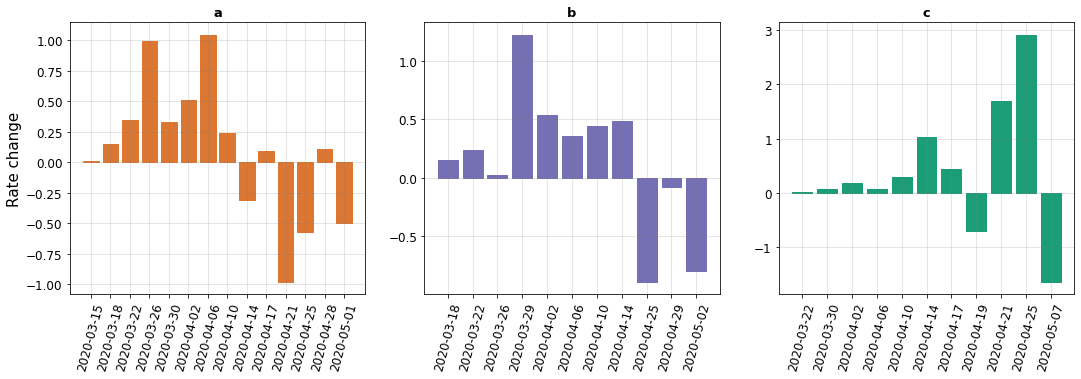

In [72]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(18, 5))

deltas1 = Model_C.params['delta'].mean(0)
ax1.bar(C, deltas1, facecolor='#DC7633', edgecolor='#DC7633')
ax1.grid(True, which='major', c='gray', ls='-', lw=1, alpha=0.2)
ax1.set_title("a", fontweight='bold',fontsize=13)
ax1.xaxis.set_tick_params(labelsize=12, rotation=75)
ax1.yaxis.set_tick_params(labelsize=12)


deltas2 = Model_D.params['delta'].mean(0)
ax2.bar(D, deltas2, facecolor='#7570b3', edgecolor='#7570b3')
ax2.grid(True, which='major', c='gray', ls='-', lw=1, alpha=0.2)
ax2.set_title("b", fontweight='bold',fontsize=13)
ax2.xaxis.set_tick_params(labelsize=12, rotation=75)
ax2.yaxis.set_tick_params(labelsize=12)

deltas3 = Model_R.params['delta'].mean(0)
ax3.bar(R, deltas3, facecolor='#1b9e77', edgecolor='#1b9e77')
ax3.grid(True, which='major', c='gray', ls='-', lw=1, alpha=0.2)
ax3.set_title("c", fontweight='bold',fontsize=13)
ax3.xaxis.set_tick_params(labelsize=12, rotation=75)
ax3.yaxis.set_tick_params(labelsize=12)

ax1.set_ylabel('Rate change',fontsize=15)
# ax2.set_xlabel('Potential changepoint of Date',fontsize=15)

plt.show()

fig.tight_layout()
fig.savefig('Potential changepoint.png', format='png', dpi=600)